# <font size="7">📝 **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [10]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 1

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(30000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([30000, 2]) samples.
Target Generated: torch.Size([30000, 1]) labels.


Train shape: torch.Size([2100, 2]), Validation shape: torch.Size([27900, 2])

Starting training...
Epoch 0 | Train Loss: 1.0584 | Val Loss: 0.8183 | Val Acc: 55.68%
Epoch 100 | Train Loss: 0.6309 | Val Loss: 0.6237 | Val Acc: 57.34%
Epoch 200 | Train Loss: 0.6221 | Val Loss: 0.6162 | Val Acc: 56.35%
Epoch 300 | Train Loss: 0.6156 | Val Loss: 0.6107 | Val Acc: 58.02%
Epoch 400 | Train Loss: 0.6100 | Val Loss: 0.6063 | Val Acc: 59.81%
Epoch 500 | Train Loss: 0.6047 | Val Loss: 0.6022 | Val Acc: 62.06%
Epoch 600 | Train Loss: 0.5996 | Val Loss: 0.5977 | Val Acc: 64.13%
Epoch 700 | Train Loss: 0.5939 | Val Loss: 0.5925 | Val Acc: 66.08%
Epoch 800 | Train Loss: 0.5864 | Val Loss: 0.5856 | Val Acc: 67.89%
Epoch 900 | Train Loss: 0.5764 | Val Loss: 0.5761 | Val Acc: 69.77%
Epoch 1000 | Train Loss: 0.5624 | Val Loss: 0.5631 | Val Acc: 71.94%
Epoch 1100 | Train Loss: 0.5639 | Val Loss: 0.5653 | Val Acc: 76.47%
Epoch 1200 | Train Loss: 0.5451 | Val Loss: 0.5471 | Val Acc: 76.76%
Epoch 1300 | Tra

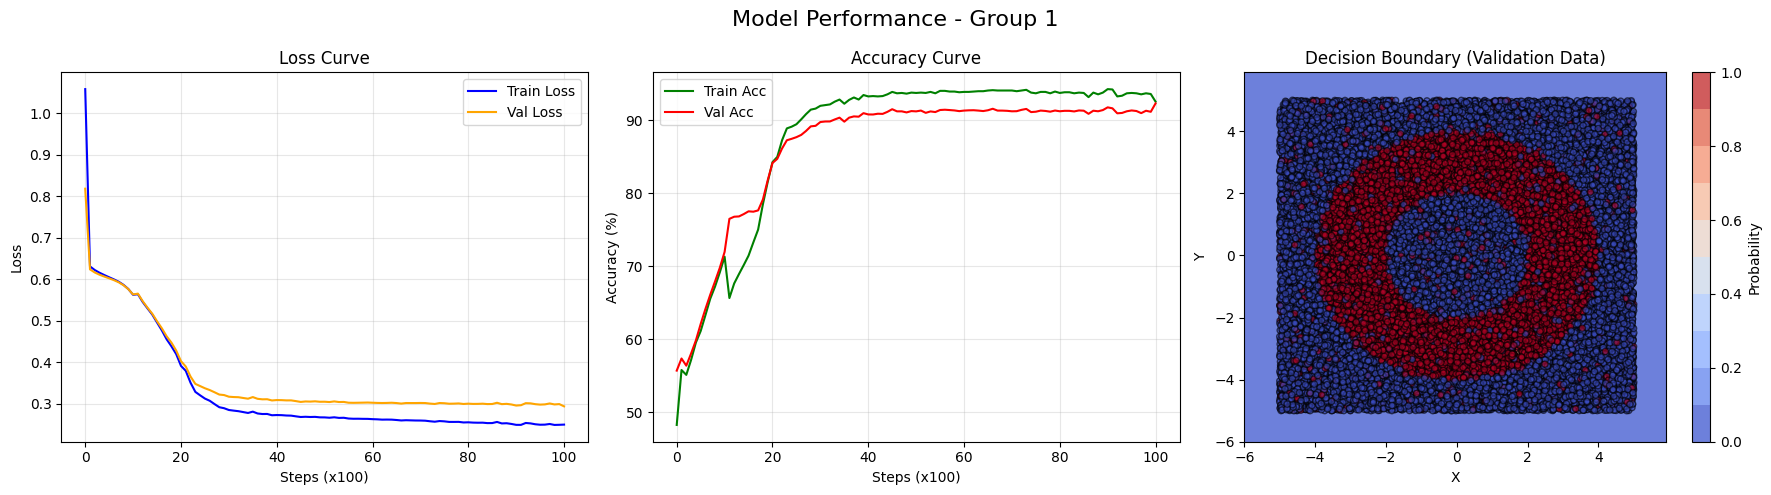

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Data Prep
train_size=int(0.7*3000)
# taking 70% of the data to train, leaving the rest to test if it actually works
X_train_np,X_val_np,y_train_np,y_val_np=X_full[:train_size],X_full[train_size:],y_full[:train_size],y_full[train_size:]

# gotta convert these to float
X_train=X_train_np.float()
y_train=y_train_np.float()
X_val=X_val_np.float()
y_val=y_val_np.float()
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")

# Building the Net
# basic settings
input_size=2
hidden_size=16
output_size=1
lr=0.05
epochs=10000

# helpers to initialize stuff
def get_random_weights(rows,cols):
    # scaling the weights so the gradients don't blow up or vanish
    w=torch.randn(rows,cols)*np.sqrt(2.0/rows)
    return w.requires_grad_(True)

def get_zeros_bias(cols):
    return torch.zeros(cols,requires_grad=True)

# setting up a 3-layer hidden network.
W1=get_random_weights(input_size,hidden_size)
b1=get_zeros_bias(hidden_size)
W2=get_random_weights(hidden_size,hidden_size)
b2=get_zeros_bias(hidden_size)
W3=get_random_weights(hidden_size,hidden_size)
b3=get_zeros_bias(hidden_size)
W4=get_random_weights(hidden_size,output_size)
b4=get_zeros_bias(output_size)

# grouping all parameters so i can update them in a loop later
params=[W1,b1,W2,b2,W3,b3,W4,b4]

# Math Helpers
def sigmoid(z):
    return 1/(1+torch.exp(-z))

def relu(z):
    return torch.max(torch.zeros_like(z),z)

def model_forward(x):
    # layer 1: simple linear transform then relu
    z1=torch.matmul(x,W1)+b1
    a1=relu(z1)
    # layer 2: same thing
    z2=torch.matmul(a1,W2)+b2
    a2=relu(z2)
    # layer 3: one more time
    z3=torch.matmul(a2,W3)+b3
    a3=relu(z3)
    # output: condensing it down to a single probability
    z4=torch.matmul(a3,W4)+b4
    y_hat=sigmoid(z4)
    return y_hat

def binary_cross_entropy(y_pred,y_true):
    # clamping these values slightly because log(0) is NaN and breaks everything
    y_pred=torch.clamp(y_pred,1e-7,1-1e-7)
    # standard loss formula for binary classification
    loss=-torch.mean(y_true*torch.log(y_pred)+(1-y_true)*torch.log(1-y_pred))
    return loss

def get_accuracy(y_pred,y_true):
    # if it's over 0.5, we call it a 1. otherwise 0.
    preds=(y_pred>=0.5).float()
    correct=(preds==y_true).float().sum()
    return (correct/y_true.shape[0])*100

# (Training)
train_loss_hist,val_loss_hist=[],[]
train_acc_hist,val_acc_hist=[],[]

print("\nStarting training...")

for i in range(epochs):
    # 1. pass the data through the model
    y_pred=model_forward(X_train)
    # 2. calculate how wrong we were
    loss=binary_cross_entropy(y_pred,y_train)
    # 3. backprop - this figures out who to blame (gradients)
    loss.backward()

    # 4. update the weights manually (SGD)
    with torch.no_grad():
        for p in params:
            p-=lr*p.grad
            p.grad.zero_() # have to clear gradients or they accumulate

    # 5. checking in every 100 steps to see if it's actually learning
    if i%100==0 or i==epochs-1:
        with torch.no_grad():
            # how well are we doing on the training set?
            acc_train=get_accuracy(y_pred,y_train)
            # seeing how it handles data it hasn't seen before
            y_val_pred=model_forward(X_val)
            loss_val=binary_cross_entropy(y_val_pred,y_val)
            acc_val=get_accuracy(y_val_pred,y_val)
            # keeping track of stats for the plots
            train_loss_hist.append(loss.item())
            val_loss_hist.append(loss_val.item())
            train_acc_hist.append(acc_train.item())
            val_acc_hist.append(acc_val.item())
            print(f"Epoch {i} | Train Loss: {loss.item():.4f} | Val Loss: {loss_val.item():.4f} | Val Acc: {acc_val:.2f}%")

# Visual Proof
fig,axes=plt.subplots(1,3,figsize=(18,5))
plt.suptitle(f"Model Performance - Group {GROUP_NUMBER}",fontsize=16)

# Plot 1: watching the error go down
axes[0].plot(train_loss_hist,label='Train Loss',color='blue')
axes[0].plot(val_loss_hist,label='Val Loss',color='orange')
axes[0].set_title("Loss Curve")
axes[0].set_xlabel("Steps (x100)")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(True,alpha=0.3)

# Plot 2: watching the accuracy go up
axes[1].plot(train_acc_hist,label='Train Acc',color='green')
axes[1].plot(val_acc_hist,label='Val Acc',color='red')
axes[1].set_title("Accuracy Curve")
axes[1].set_xlabel("Steps (x100)")
axes[1].set_ylabel("Accuracy (%)")
axes[1].legend()
axes[1].grid(True,alpha=0.3)

# Plot 3: showing the "Donut"
# making a grid of points so we can draw the decision boundary
x_range=np.arange(-6,6,0.1)
y_range=np.arange(-6,6,0.1)
xx,yy=np.meshgrid(x_range,y_range)

# flattening grid to feed into the model
grid_tensor=torch.tensor(np.c_[xx.ravel(),yy.ravel()],dtype=torch.float32)

with torch.no_grad():
    preds=model_forward(grid_tensor)
    Z=preds.reshape(xx.shape).numpy()

# drawing the contours and overlaying the validation points
contour=axes[2].contourf(xx,yy,Z,alpha=0.8,cmap="coolwarm",levels=np.linspace(0,1,11))
axes[2].scatter(X_val[:,0],X_val[:,1],c=y_val[:,0],cmap="coolwarm",edgecolors='k',s=20,alpha=0.6)
axes[2].set_title("Decision Boundary (Validation Data)")
axes[2].set_xlabel("X")
axes[2].set_ylabel("Y")
plt.colorbar(contour,ax=axes[2],label="Probability")

plt.tight_layout()
plt.show()